In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 125

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
print(f'Shape of the data {df.shape}')
print("--------------------------------------------------------------------------------------//")
print(df.describe)
print("--------------------------------------------------------------------------------------//")
print(df.info())
print("--------------------------------------------------------------------------------------//")
df.head()

Shape of the data (200, 5)
--------------------------------------------------------------------------------------//
<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 13

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df = df.rename(columns={"Annual Income (k$)": "AnnualIncome", "Spending Score (1-100)": "SpendingScore"})

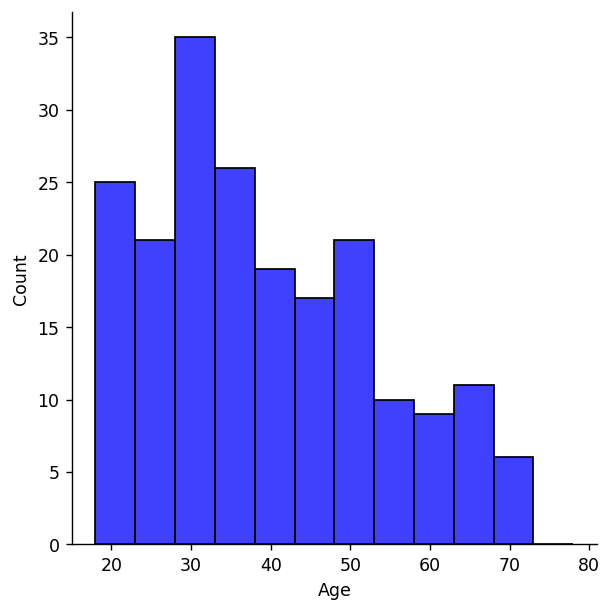

In [13]:
bins = range(18, 80, 5)
sns.displot(df.Age, color='blue', kde=False, bins=bins, label='Existing')

<AxesSubplot:xlabel='Age'>

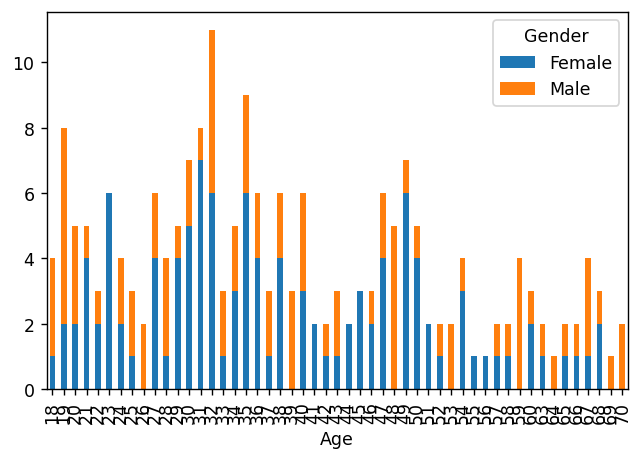

In [22]:
counts = df.groupby(['Age', 'Gender']).Age.count().unstack()
counts.plot(kind='bar', stacked=True)

In [23]:
df.Age.min()

18

In [24]:
bins= [18,25,35,45,55,65,75,85]
labels = ['18-25','25-35','35-45','45-55','55-65','65-75','75-85']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

bins= [15,25,35,45,55,65,75,85,95,105,115,125,135,145]
df['IncomeGroup'] = pd.cut(df['AnnualIncome'], bins=bins, right=False)

bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
df['SpendingScoreGroups'] = pd.cut(df['SpendingScore'], bins=bins, right=False)

<AxesSubplot:xlabel='IncomeGroup'>

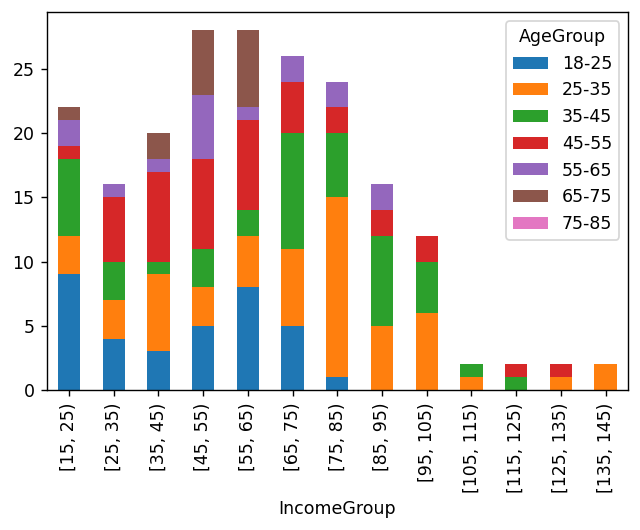

In [25]:
counts = df.groupby(['IncomeGroup', 'AgeGroup']).AgeGroup.count().unstack()
counts.plot(kind='bar', stacked=True)

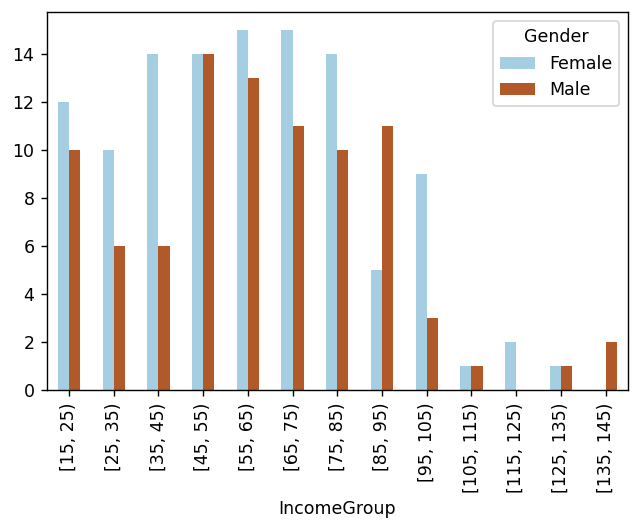

In [26]:
counts = df.groupby(['IncomeGroup', 'Gender']).Age.count().unstack()
ax = counts.plot(kind='bar',stacked = False, colormap = 'Paired')
plt.show()

In [27]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,AgeGroup,IncomeGroup,SpendingScoreGroups
0,1,Male,19,15,39,18-25,"[15, 25)","[35, 40)"
1,2,Male,21,15,81,18-25,"[15, 25)","[80, 85)"
2,3,Female,20,16,6,18-25,"[15, 25)","[5, 10)"
3,4,Female,23,16,77,18-25,"[15, 25)","[75, 80)"
4,5,Female,31,17,40,25-35,"[15, 25)","[40, 45)"


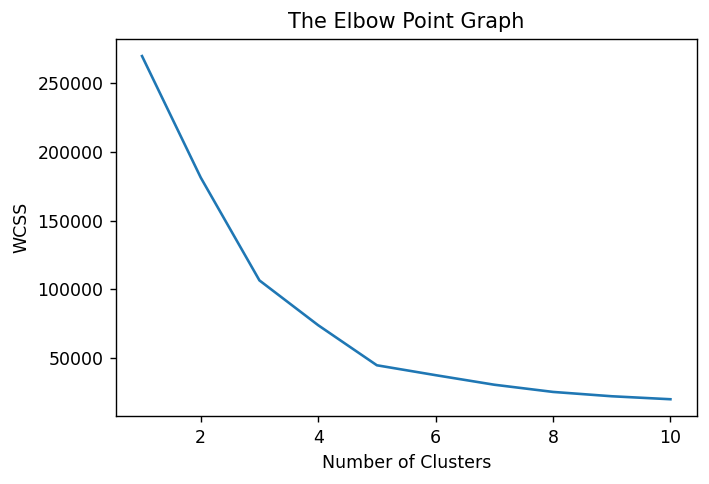

In [28]:
from sklearn.cluster import KMeans

cluster = df.iloc[:,[3,4]].values
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(cluster)

  wcss.append(kmeans.inertia_)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel="Number of Clusters", ylabel="WCSS")
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')

plt.show()

In [29]:
kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=42)
Y = kmeans.fit_predict(cluster)
print(np.unique(Y))

[0 1 2 3 4]


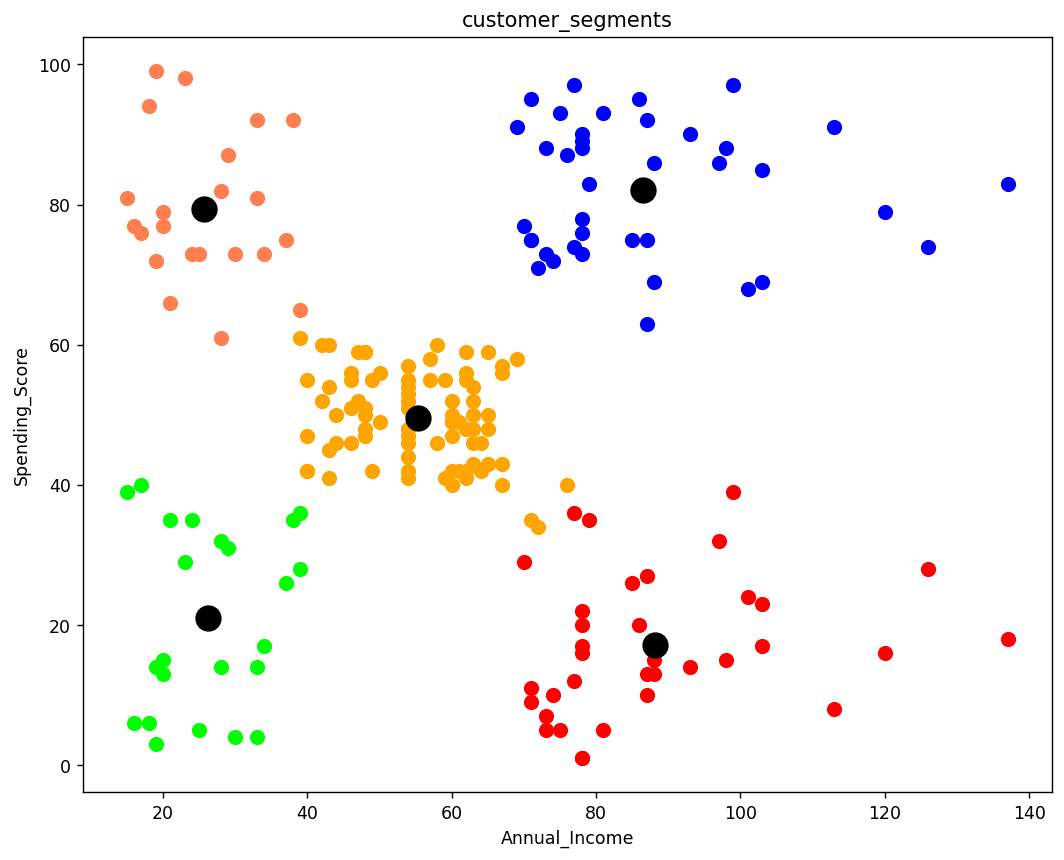

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(cluster[Y==0,0], cluster[Y==0,1], s=60, c='orange', label='Cluster 1')
plt.scatter(cluster[Y==1,0], cluster[Y==1,1], s=60, c='red', label='Cluster 2')
plt.scatter(cluster[Y==2,0], cluster[Y==2,1], s=60, c='lime', label='Cluster 3')
plt.scatter(cluster[Y==3,0], cluster[Y==3,1], s=60, c='coral', label='Cluster 4')
plt.scatter(cluster[Y==4,0], cluster[Y==4,1], s=60, c='blue', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black')

plt.title('customer_segments')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.show()